<a href="https://colab.research.google.com/github/GayBoston/MachineLearning/blob/main/Copy_of_IceCreamExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load some libraries

In [ ]:
#import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Generate 100 input values (temperature) from 20 to 100

In [ ]:
temperature = np.linspace(20,100,75)

Now let's pretend we have collected some sales figures over time, by slightly randomizing a linear function

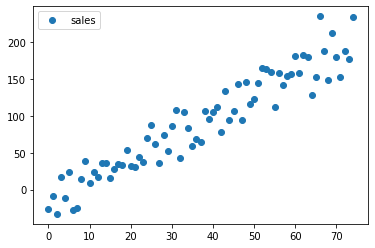

In [ ]:
rng = np.random.default_rng()
actual_sales = 2.7 * temperature - 75 + rng.normal(0,20,temperature.size) 
plt.plot(actual_sales, 'o', label='sales')
plt.legend()

Ok, pretending that we don't already know that the relationship is linear (and that the slope is 2.7 and that the intercept is -75)  by looking at the graph it seems a reasonable guess that the relationship is indeed linear.   So we choose as our model:   sales = m * temperature + b  and we'll try to "learn" the correct values of m and b

Lets just pick some random slope and intercept

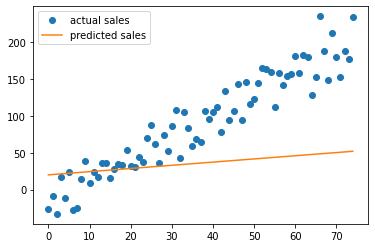

In [ ]:
m = 0.4
b = 12
predicted_sales = m * temperature + b  # this is our model
plt.plot(actual_sales, 'o', label='actual sales')
plt.plot(predicted_sales, '-', label='predicted sales')
plt.legend()

Ok, that's pretty bad... but how do we measure how bad?   One way is to take the sum of the squares of the differences between our predicted value and the actual value (Mean Squared Error).  These differences are called residuals.  To make this measurement somewhat independent of the number of samples, we can divide the sum by the number of samples.   See  [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error)

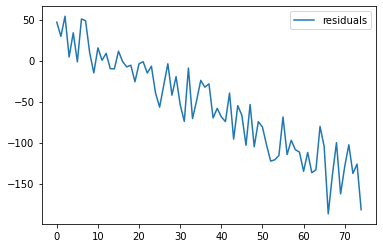

In [ ]:
plt.plot(predicted_sales-actual_sales, '-', label='residuals')
plt.legend()

In [ ]:
print("MSE: ", (np.sum((actual_sales-predicted_sales)**2)/actual_sales.size))

MSE:  6539.2918591510115


In [ ]:
def mse(predicted, actual):
  return np.sum((actual-predicted)**2)/actual.size

So this number gives us some kind of measure of how bad our prediction is, with the idea that we can adjust m and b to minimize that error.   This error depends on our choice of m and b... and we can see it as a function of m and b (for a given set of training data)


In [ ]:
def predict(x, m, b):
  return m*x+b

def cost(x, m, b, ytarget):
  y = predict(x, m, b)
  return mse(y, ytarget)

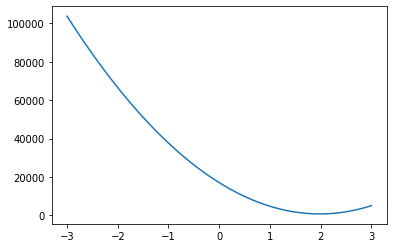

In [ ]:
mm = np.linspace(-3,3,50)

c = np.array([cost(temperature, m, -20, actual_sales) for m in mm])

plt.plot(mm, c)

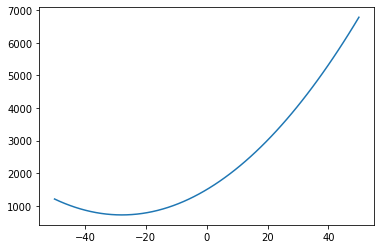

In [ ]:
bb = np.linspace(-50,50,60)
c = np.array([cost(temperature, 2, b, actual_sales) for b in bb])
plt.plot(bb,c)

(60, 50)
(60, 50)
(3000,)


<a list of 8 text.Text objects>

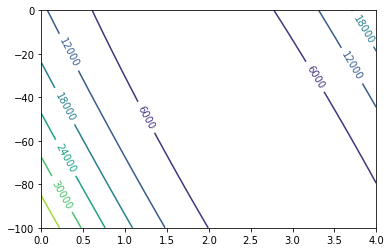

In [ ]:
mm = np.linspace(0,4,50)
bb = np.linspace(0,-100,60)
mmm, bbb = np.meshgrid(mm, bb)

print(mmm.shape)
print(bbb.shape)

z = np.array([cost(temperature, m, b, actual_sales) for (m, b) in zip(mmm.ravel(),bbb.ravel())])

print(z.shape)

z.shape = mmm.shape

#mmm * temperature + bbb * np.ones_like(temperature)
CS = plt.contour(mmm,bbb,z)
plt.clabel(CS, CS.levels, inline=True, fontsize=10)

In [ ]:
def derivative(fun, x, h):
  return fun(x+h)-fun(x)/h
  # return (fun(x+h)-fun(x-h))/(h*2)


In [ ]:
def costWRTb(b):    #cost assuming slope(m) is 2
  return cost(temperature, 2, b, actual_sales)
print(temperature[0])
print(actual_sales[0])

print(derivative(costWRTb, -20, 6))

20.0
-26.781729380356087
781.3011819567787


2(f(x)-t(x))     2x(f(x)-t(x))   t(x) == actual_sales  f(x) == predicted